In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Input-output properties cells

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
rootFolder = '/home/fernando/Dropbox/SUNY/2022/S1_netpyne/sim/'
# rootFolder = os.getcwd()
os.chdir(rootFolder)
print(rootFolder)
folder = os.listdir('cell_data/')
folder = sorted(folder)

savedata = 1 # Save Netpyne and BBP soma_voltage

/home/fernando/Dropbox/SUNY/2022/S1_netpyne/sim/


In [4]:
# !nrnivmodl mod

In [5]:
def loadTemplateName(cellnumber):     
    f = open(outFolder+'/template.hoc', 'r')
    for line in f.readlines():
        if 'begintemplate' in line:
            templatename = str(line)     
    templatename=templatename[:-1]        
    templatename=templatename[14:]
    return templatename

## Netpyne

In [6]:
from netpyne import specs, sim   

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

In [7]:
%matplotlib inline

In [8]:
## cfg  
cfg = specs.SimConfig()					            # object of class SimConfig to store simulation configuration
cfg.duration = 600.0 						            # Duration of the simulation, in ms
cfg.dt = 0.05								                # Internal integration timestep to use
cfg.verbose = False							                # Show detailed messages 
cfg.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
cfg.recordStep = 0.1 			
cfg.printRunTime = 0.1 # in sec			

cfg.seeds = {'conn': 1, 'stim': 1, 'loc': 1} 
cfg.hParams = {'celsius': 34, 'v_init': -71.0}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True  
#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.filename = 'model_output'  			# Set file output name
cfg.savePickle = False         	## Save pkl file
cfg.saveJson = False	           	## Save json file
cfg.saveDataInclude = ['simData'] ## 'simData' , 'simConfig', 'netParams'
cfg.backupCfgFile = None 		##  
cfg.gatherOnlySimData = False	##  
cfg.saveCellSecs = False			
cfg.saveCellConns = True	

cfg.analysis['plotTraces'] = {'include': [i for i in range(100)], 'oneFigPer': 'trace', 'overlay': True, 'timeRange': [0,4000], 'saveFig': False, 'showFig': True, 'figSize':(12,4)} # Plot recorded traces for this list of cells
# cfg.analysis['plotShape'] = {'includePre': [0],'includePre': [0], 'saveFig': True, 'showFig': True, 'figSize':(12,12)}


In [9]:
# for i,metype in enumerate(folder):
#     print(i,metype)
folder[755:775]

['L5_STPC_cADpyr232_1',
 'L5_STPC_cADpyr232_2',
 'L5_STPC_cADpyr232_3',
 'L5_STPC_cADpyr232_4',
 'L5_STPC_cADpyr232_5',
 'L5_TTPC1_cADpyr232_1',
 'L5_TTPC1_cADpyr232_2',
 'L5_TTPC1_cADpyr232_3',
 'L5_TTPC1_cADpyr232_4',
 'L5_TTPC1_cADpyr232_5',
 'L5_TTPC2_cADpyr232_1',
 'L5_TTPC2_cADpyr232_2',
 'L5_TTPC2_cADpyr232_3',
 'L5_TTPC2_cADpyr232_4',
 'L5_TTPC2_cADpyr232_5',
 'L5_UTPC_cADpyr232_1',
 'L5_UTPC_cADpyr232_2',
 'L5_UTPC_cADpyr232_3',
 'L5_UTPC_cADpyr232_4',
 'L5_UTPC_cADpyr232_5']

In [10]:
#------------------------------------------------------------------------------
# Cell parameters
#------------------------------------------------------------------------------
#StochKv_deterministic.mod
for cellnumber in range(755,775):
    cellName = folder[cellnumber]
    outFolder = rootFolder+'/cell_data/'+folder[cellnumber]
    cellTemplateName = loadTemplateName(cellnumber)
    cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=False,
        conds={'cellType': cellName, 'cellModel': 'HH_full'},
        fileName='cellwrapper.py',
        cellName='loadCell',
        cellInstance = True,
        cellArgs={'cellName': cellName, 'cellTemplateName': cellTemplateName})

NEURON: morphology_d16b0be14e : a template cannot be redefined
 in morphology.hoc near line 34
 begintemplate morphology_d16b0be14e
                                   ^
        xopen("morphology.hoc")
      execute1("{xopen("mo...")
    load_file("morphology.hoc")
  xopen("template.hoc")
NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")
      execute1("{xopen("bi...")
    load_file("biophysics.hoc")
  xopen("template.hoc")
NEURON: synapses_d16b0be14e : a template cannot be redefined
 in synapses.hoc near line 31
 begintemplate synapses_d16b0be14e                
                                 ^
        xopen("synapses.hoc")
      execute1("{xopen("sy...")
    load_file("synapses/s...")
  xopen("template.hoc")


	0 
	0 
	0 
cADpyr232_L5_STPC_d16b0be14e[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_STPC_d63221b7a8[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_STPC_a78c3cbca8[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_STPC_4ec7a36770[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_STPC_6d41d50fcb[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_TTPC1_0fb1ca4724[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_TTPC1_fc944c2cf3[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_TTPC1_da1088139b[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_TTPC1_ded64abc4d[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_TTPC1_b6836fcf6f[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_TTPC2_8052133265[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_TTPC2_a28017c6c7[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_TTPC2_a467781f53[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_TTPC2_c46a93702c[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_TTPC2_8bab918b58[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_UTPC_5e3840b51e[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_UTPC_34f655e7f8[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_UTPC_d736225429[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_UTPC_da1143b075[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_UTPC_79412a7e72[0]


In [11]:
for cellnumber in range(755,775):
    # ---------------------------------------------------------------------------------------------------- #
    cellName = folder[cellnumber]
    outFolder = rootFolder+'/cell_data/'+folder[cellnumber]
    cellTemplateName = loadTemplateName(cellnumber)
    
    # ---------------------------------------------------------------------------------------------------- #
    netParams.renameCellParamsSec(label=cellName, oldSec='soma_0', newSec='soma')
    
    for secname2 in netParams.cellParams[cellName]['secLists'].keys():
        if 'soma_0' in netParams.cellParams[cellName]['secLists'][secname2]:
            print(cellName,secname2,netParams.cellParams[cellName]['secLists'][secname2][0])
            netParams.cellParams[cellName]['secLists'][secname2][0] = 'soma'
    # ---------------------------------------------------------------------------------------------------- #
    
    nonSpiny = ['axon_0', 'axon_1']
    netParams.cellParams[cellName]['secLists']['spiny'] = [sec for sec in netParams.cellParams[cellName]['secLists']['all'] if sec not in nonSpiny]
    nonSpinyEE = ['axon_0', 'axon_1', 'soma']
    netParams.cellParams[cellName]['secLists']['spinyEE'] = [sec for sec in netParams.cellParams[cellName]['secLists']['all'] if sec not in nonSpinyEE]    
    
    # ---------------------------------------------------------------------------------------------------- #
    for ii in range(5):
        netParams.popParams[cellName + '_' + str(ii)] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}

L5_STPC_cADpyr232_1 all soma_0
L5_STPC_cADpyr232_1 somatic soma_0
L5_STPC_cADpyr232_2 all soma_0
L5_STPC_cADpyr232_2 somatic soma_0
L5_STPC_cADpyr232_3 all soma_0
L5_STPC_cADpyr232_3 somatic soma_0
L5_STPC_cADpyr232_4 all soma_0
L5_STPC_cADpyr232_4 somatic soma_0
L5_STPC_cADpyr232_5 all soma_0
L5_STPC_cADpyr232_5 somatic soma_0
L5_TTPC1_cADpyr232_1 all soma_0
L5_TTPC1_cADpyr232_1 somatic soma_0
L5_TTPC1_cADpyr232_2 all soma_0
L5_TTPC1_cADpyr232_2 somatic soma_0
L5_TTPC1_cADpyr232_3 all soma_0
L5_TTPC1_cADpyr232_3 somatic soma_0
L5_TTPC1_cADpyr232_4 all soma_0
L5_TTPC1_cADpyr232_4 somatic soma_0
L5_TTPC1_cADpyr232_5 all soma_0
L5_TTPC1_cADpyr232_5 somatic soma_0
L5_TTPC2_cADpyr232_1 all soma_0
L5_TTPC2_cADpyr232_1 somatic soma_0
L5_TTPC2_cADpyr232_2 all soma_0
L5_TTPC2_cADpyr232_2 somatic soma_0
L5_TTPC2_cADpyr232_3 all soma_0
L5_TTPC2_cADpyr232_3 somatic soma_0
L5_TTPC2_cADpyr232_4 all soma_0
L5_TTPC2_cADpyr232_4 somatic soma_0
L5_TTPC2_cADpyr232_5 all soma_0
L5_TTPC2_cADpyr232_5 somat

In [12]:
for cellnumber in range(755,775):
    cellName = folder[cellnumber]
    print(netParams.cellParams[cellName]['secLists']['basal'][-1])

dend_41
dend_45
dend_59
dend_45
dend_59
dend_112
dend_112
dend_112
dend_112
dend_82
dend_79
dend_95
dend_95
dend_95
dend_95
dend_42
dend_42
dend_42
dend_60
dend_63


In [13]:
# create custom list of spike times
# spkTimes = [500,2500,2550,2600,2650,2700,2750,2800,2850,2900,3400]

spkTimes = [500]

netParams.popParams['presyn'] = {'cellModel': 'VecStim', 'numCells': 1, 'spkTimes': spkTimes}  # VecStim with spike times

In [14]:
netParams.cellParams.keys()

odict_keys(['L5_STPC_cADpyr232_1', 'L5_STPC_cADpyr232_2', 'L5_STPC_cADpyr232_3', 'L5_STPC_cADpyr232_4', 'L5_STPC_cADpyr232_5', 'L5_TTPC1_cADpyr232_1', 'L5_TTPC1_cADpyr232_2', 'L5_TTPC1_cADpyr232_3', 'L5_TTPC1_cADpyr232_4', 'L5_TTPC1_cADpyr232_5', 'L5_TTPC2_cADpyr232_1', 'L5_TTPC2_cADpyr232_2', 'L5_TTPC2_cADpyr232_3', 'L5_TTPC2_cADpyr232_4', 'L5_TTPC2_cADpyr232_5', 'L5_UTPC_cADpyr232_1', 'L5_UTPC_cADpyr232_2', 'L5_UTPC_cADpyr232_3', 'L5_UTPC_cADpyr232_4', 'L5_UTPC_cADpyr232_5'])

In [15]:
list(netParams.popParams.keys())[0:-1]

['L5_STPC_cADpyr232_1_0',
 'L5_STPC_cADpyr232_1_1',
 'L5_STPC_cADpyr232_1_2',
 'L5_STPC_cADpyr232_1_3',
 'L5_STPC_cADpyr232_1_4',
 'L5_STPC_cADpyr232_2_0',
 'L5_STPC_cADpyr232_2_1',
 'L5_STPC_cADpyr232_2_2',
 'L5_STPC_cADpyr232_2_3',
 'L5_STPC_cADpyr232_2_4',
 'L5_STPC_cADpyr232_3_0',
 'L5_STPC_cADpyr232_3_1',
 'L5_STPC_cADpyr232_3_2',
 'L5_STPC_cADpyr232_3_3',
 'L5_STPC_cADpyr232_3_4',
 'L5_STPC_cADpyr232_4_0',
 'L5_STPC_cADpyr232_4_1',
 'L5_STPC_cADpyr232_4_2',
 'L5_STPC_cADpyr232_4_3',
 'L5_STPC_cADpyr232_4_4',
 'L5_STPC_cADpyr232_5_0',
 'L5_STPC_cADpyr232_5_1',
 'L5_STPC_cADpyr232_5_2',
 'L5_STPC_cADpyr232_5_3',
 'L5_STPC_cADpyr232_5_4',
 'L5_TTPC1_cADpyr232_1_0',
 'L5_TTPC1_cADpyr232_1_1',
 'L5_TTPC1_cADpyr232_1_2',
 'L5_TTPC1_cADpyr232_1_3',
 'L5_TTPC1_cADpyr232_1_4',
 'L5_TTPC1_cADpyr232_2_0',
 'L5_TTPC1_cADpyr232_2_1',
 'L5_TTPC1_cADpyr232_2_2',
 'L5_TTPC1_cADpyr232_2_3',
 'L5_TTPC1_cADpyr232_2_4',
 'L5_TTPC1_cADpyr232_3_0',
 'L5_TTPC1_cADpyr232_3_1',
 'L5_TTPC1_cADpyr232_3_2',

In [16]:
# import scipy.stats as stats
# lower, upper = 0.48, 0.52
# mu, sigma = 0.50, 0.02
# X = stats.truncnorm(
#     (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
# Use = X.rvs(100)

# --------------------------------------------------------------------------------------#
#BBP	gsyn	decay	       use	     dep	 fac	types	rules
# 5	0.91±0.61	6.44±1.70	0.32±0.140	144±80	62±31	I3-IE	SBC_bNAC or LBC-NBC_(cNAC dSTUT cSTUT bSTUT):Excitatory
for ii in range(100):
    netParams.synMechParams['INH:L5_PC'+str(ii+1)] = {'mod': 'DetGABAAB',
                                         'Use': 0.32,
                                         'Dep': 144.0,
                                         'Fac': 62.0,
                                         'tau_d_GABAA': 6.44,
                                         'tau_r_GABAA': 0.2,   #rng.lognormal(0.2, 0.1) in synapses.hoc  
                                         'tau_d_GABAB': 260.9,
                                         'tau_r_GABAB': 3.5,
                                         'e_GABAA': -70.0, #= -80   (mV) : GABAA reversal potential    
                                            }
    

In [17]:
import random

# lower, upper = 0.5, 1.0
# mu, sigma = 0.75, 0.32
# X = stats.truncnorm(
#     (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)

# weight = X.rvs(100)

## Cell connectivity rules
for ii in range(100):
    
    listsecs = random.sample(netParams.cellParams[cellName]['secLists']['spiny'], len(netParams.cellParams[cellName]['secLists']['spiny']))

    netParams.connParams['pre->post'+str(ii+1)] = { 
            'preConds': {'pop': 'presyn'},
            'postConds': {'pop': list(netParams.popParams.keys())[ii]},
            'sec': listsecs,                  # target postsyn section
            'synMech': 'INH:L5_PC'+str(ii+1),              # target synaptic mechanism
            'weight': 0.91, # weight[ii], # # synaptic weight 
            'synsPerConn': 15, 
            'delay': 0.05}       
    

In [18]:
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations
sim.net.createCells()              			# instantiate network cells based on defined populations
sim.net.connectCells()            			# create connections between cells based on params


Start time:  2023-04-19 19:17:48.420544

Creating network of 101 cell populations on 1 hosts...
  Number of cells on node 0: 101 
  Done; cell creation time = 5.51 s.
Making connections...
  Number of connections on node 0: 100 
  Number of synaptic contacts on node 0: 1500 
  Done; cell connection time = 0.11 s.


[[{preGid: 100, sec: 'dend_3', loc: 0.6905377878809668, synMech: 'INH:L5_PC1', weight: 0.91, delay: 0.05, label: 'pre->post1', preLoc: 0.5, hObj: NetCon[0]},
  {preGid: 100, sec: 'apic_6', loc: 0.4809674290550305, synMech: 'INH:L5_PC1', weight: 0.91, delay: 0.05, label: 'pre->post1', preLoc: 0.5, hObj: NetCon[1]},
  {preGid: 100, sec: 'dend_20', loc: 0.8098663003813512, synMech: 'INH:L5_PC1', weight: 0.91, delay: 0.05, label: 'pre->post1', preLoc: 0.5, hObj: NetCon[2]},
  {preGid: 100, sec: 'apic_29', loc: 0.8522772044013662, synMech: 'INH:L5_PC1', weight: 0.91, delay: 0.05, label: 'pre->post1', preLoc: 0.5, hObj: NetCon[3]},
  {preGid: 100, sec: 'dend_21', loc: 0.758671445360796, synMech: 'INH:L5_PC1', weight: 0.91, delay: 0.05, label: 'pre->post1', preLoc: 0.5, hObj: NetCon[4]},
  {preGid: 100, sec: 'apic_35', loc: 0.9259069656619969, synMech: 'INH:L5_PC1', weight: 0.91, delay: 0.05, label: 'pre->post1', preLoc: 0.5, hObj: NetCon[5]},
  {preGid: 100, sec: 'apic_15', loc: 0.3988261075

In [19]:
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)

  Number of stims on node 0: 0 
  Done; cell stims creation time = 0.00 s.
Recording 100 traces of 1 types on node 0


{spkt: Vector[104791], spkid: Vector[104792], V_soma: {cell_0: Vector[104793], cell_1: Vector[104794], cell_2: Vector[104795], cell_3: Vector[104796], cell_4: Vector[104797], cell_5: Vector[104798], cell_6: Vector[104799], cell_7: Vector[104800], cell_8: Vector[104801], cell_9: Vector[104802], cell_10: Vector[104803], cell_11: Vector[104804], cell_12: Vector[104805], cell_13: Vector[104806], cell_14: Vector[104807], cell_15: Vector[104808], cell_16: Vector[104809], cell_17: Vector[104810], cell_18: Vector[104811], cell_19: Vector[104812], cell_20: Vector[104813], cell_21: Vector[104814], cell_22: Vector[104815], cell_23: Vector[104816], cell_24: Vector[104817], cell_25: Vector[104818], cell_26: Vector[104819], cell_27: Vector[104820], cell_28: Vector[104821], cell_29: Vector[104822], cell_30: Vector[104823], cell_31: Vector[104824], cell_32: Vector[104825], cell_33: Vector[104826], cell_34: Vector[104827], cell_35: Vector[104828], cell_36: Vector[104829], cell_37: Vector[104830], cell_

In [20]:
sim.runSim()                      			# run Neuron simulation  

0.0s

Running simulation using NEURON for 600.0 ms...
0.1s
0.2s
0.3s
0.4s
0.5s
0.6s
  Done; run time = 901.38 s; real-time ratio: 0.00.



Gathering data...
  Done; gather time = 0.10 s.

Analyzing...
  Cells: 101
  Connections: 100 (0.99 per cell)
  Synaptic contacts: 1500 (14.85 per cell)
  Spikes: 1 (0.02 Hz)
  Simulated time: 0.6 s; 1 workers
  Run time: 901.38 s
Plotting recorded cell traces ... trace


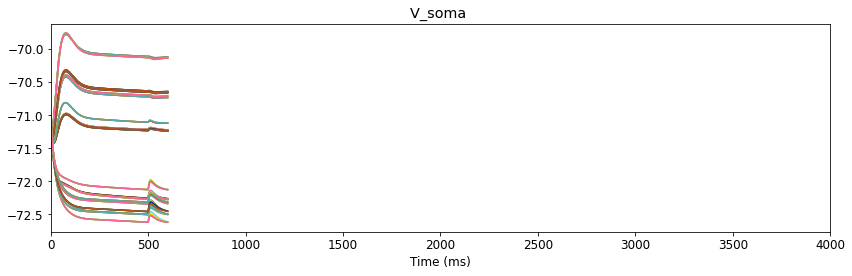

  Done; plotting time = 0.28 s

Total time = 907.52 s


In [21]:
sim.gatherData()                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()         			# plot spike raster etc

In [22]:
# sim.analysis.plotRaster(figSize=(10, 3))

Plotting recorded cell traces ... trace


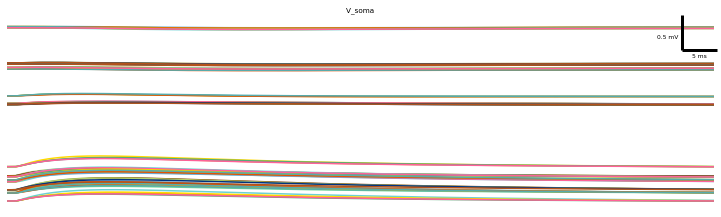

In [44]:
alltraces = []
gmax1 = []

Traces2 = sim.analysis.plotTraces(oneFigPer='trace', overlay=1, timeRange=[499,599],axis=False,legend=False,scaleBarLoc=1,figSize=(10, 3),fontSize=6)
for number in range(100):
    if np.max(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma'])-np.min(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma']) > 0.01:
        alltraces.append(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma'])
        gmax1.append(np.max(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma'])-np.min(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma']))
#         print(number,np.max(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma'])-np.min(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma']))



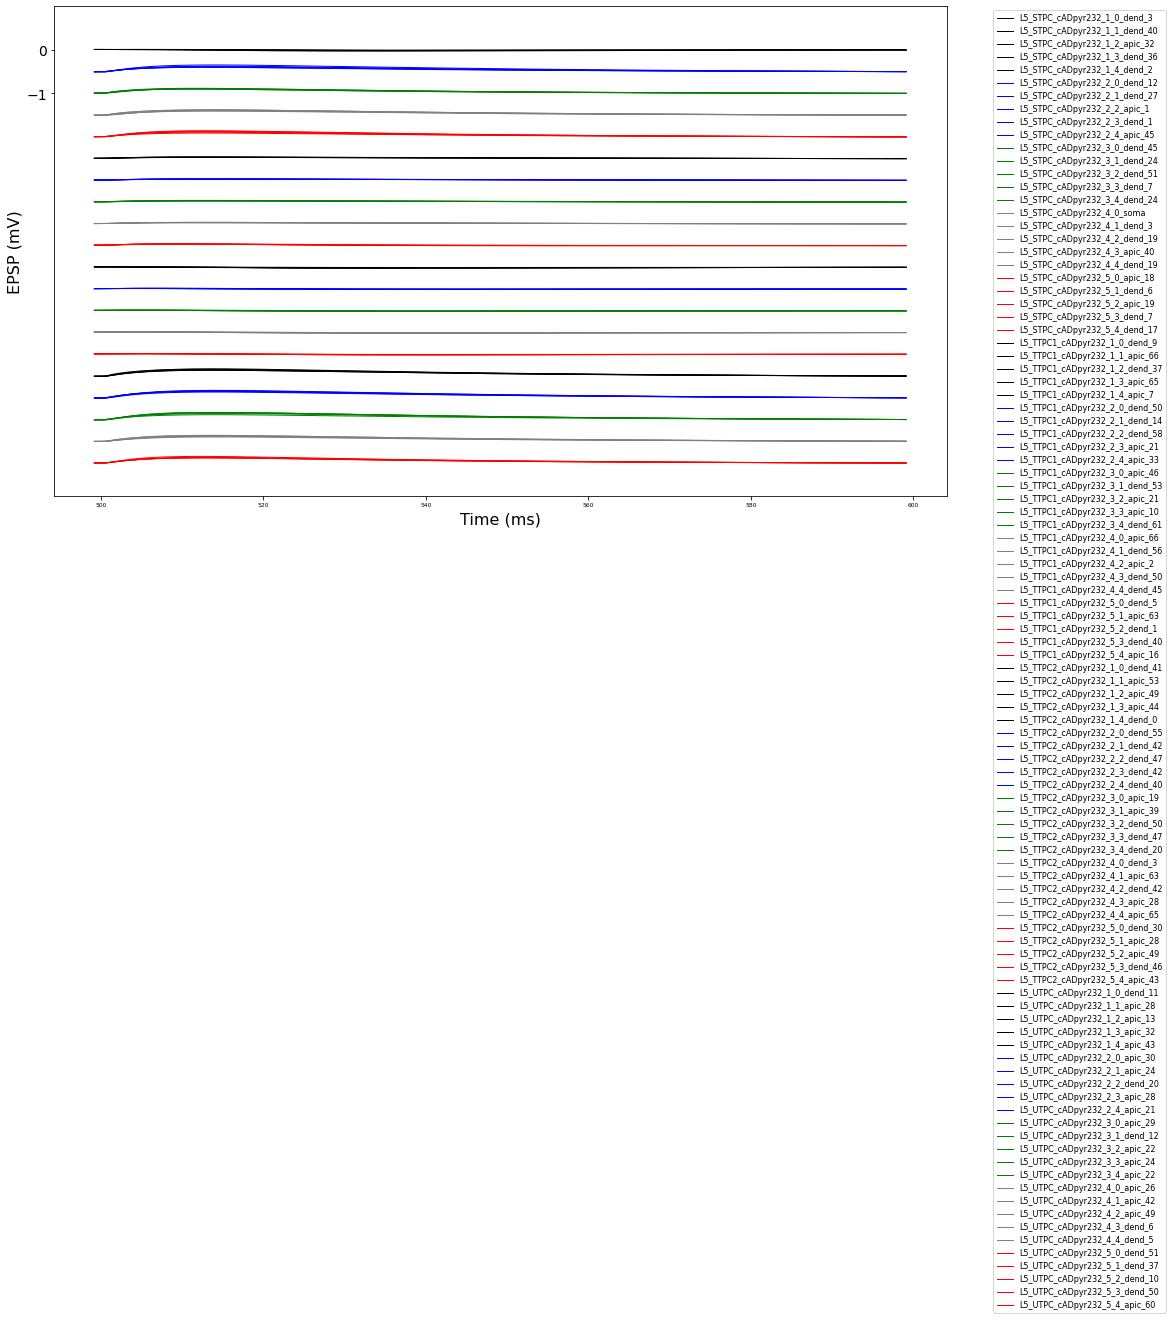

In [47]:
figSize = (16,9)
fig = plt.figure(figsize=figSize)  # Open a new figure
clr = ["black", "blue","green","gray", "red","black", "blue","green","gray", "red","black", "blue","green","gray", "red","black", "blue","green","gray", "red"]
number=0
for i in range(20):
    for number2 in range(i,100,20):
        plt.plot(Traces2[1]['tracesData'][number]['t'][2:],Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma']-Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma'][999]-0.5*i, label= sim.net.allCells[number]['tags']['pop'] + '_' + sim.net.allCells[number]['conns'][0]['sec'], linewidth=1.0, color=clr[i])
        number+=1
        
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0), fontsize=8)
# plt.xlim(2400,4150)
plt.ylim(-10.25,1.0)
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('EPSP (mV)', fontsize=16)
# plt.xticks(range(2400,3900,200), range(0,1500,200), fontsize=14);
plt.yticks([0,-1], fontsize=14);

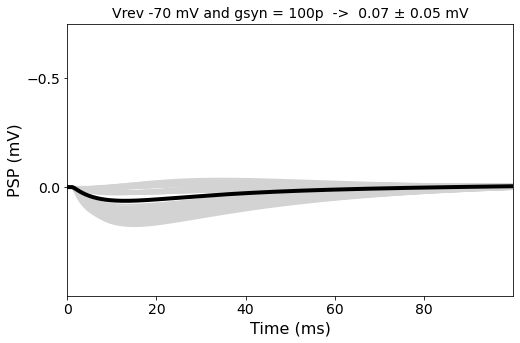

In [50]:
figSize = (8,5)
fig = plt.figure(figsize=figSize)  # Open a new figure
for number in range(np.shape(alltraces)[0]):
    plt.plot(alltraces[number]-alltraces[number][0],color = 'lightgray',linewidth=2.0)

plt.title('Vrev -70 mV and gsyn = 100p  ->  %.2f ± %.2f mV' % (np.mean(gmax1),np.std(gmax1)), fontsize=14)
plt.plot(np.mean(alltraces, axis=0)-np.mean(alltraces, axis=0)[0],color = 'black', linewidth=4.0)
# plt.legend(loc='upper right', bbox_to_anchor=(0.95, 1.0))
plt.xlim(0,1000)
plt.ylim(0.5,-0.75)
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('PSP (mV)', fontsize=16)
plt.xticks(range(0,1000,200), range(0,100,20), fontsize=14);
plt.yticks([0,-0.5], fontsize=14); 

# plt.savefig('../info/IPSPmax_L5PC_type5_gabaaVrev.png', facecolor = 'white' , dpi=300)

In [ ]:
# (0.8355167606552806, 25)

In [ ]:
np.mean(gmax1), np.size(gmax1)

<!-- Connection type	s-type	in vitro PSP amplitude (mV; mean ± SD)	in silico PSP amplitude (mV; mean ± SD)	Input data sources
L5TTPC-L5MC	E1	0.28 ± 0.3	0.28 ± 0.18	Silberberg & Markram, 2007
L5MC-L5TTPC	I2	0.5 ± 0.3	0.57 ± 0.5	Silberberg & Markram, 2007
L4SS-L23PC	E2	0.7 ± 0.6	0.7 ± 0.9	Feldmeyer et al. 2002
L5STPC-L5STPC	E2	0.9 ± 0.7	0.91 ± 0.8	Le Bé et al. 2007
L5UTPC-L5UTPC	E2	0.9 ± 0.7	0.91 ± 0.8	Le Bé et al. 2007
L23PC-L23PC	E2	1 ± 0.7	1 ± 0.3	Feldmeyer et al. 2006
L23LBC-L23PC	I2	1.2 ± 1.1	1.2 ± 1.02	Blatow et al. 2003
L23NBC-L23PC	I2	1.2 ± 1.1	1.2 ± 1.02	Blatow et al. 2003
L5TTPC-L5TTPC	E2	1.3 ± 1.1	1.2 ± 0.43	Markram et al. 1997
L4SS-L4SS	E2	1.6 ± 1.0	1.9 ± 1.5	Feldmeyer et al. 1999
L4SP-L4SP	E2	1.6 ± 1.0	1.9 ± 1.5	Feldmeyer et al. 1999
L4PC-L4PC	E2	1.6 ± 1.0	1.9 ± 1.5	Feldmeyer et al. 1999
L5TTPC-L5SBC	E2	2.1 ± 1.0	1.96 ± 0.67	Angulo et al. 1999 -->
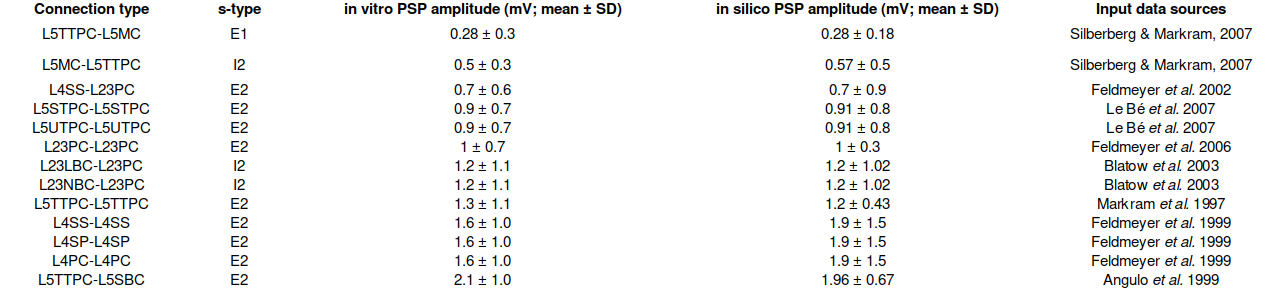

In [4]:
Connectiontype = ['L5TTPC_L5MC_E1', 'L5MC_L5TTPC_I2', 'L4SS_L23PC_E2', 'L5STPC_L5STPC_E2', 'L5UTPC_L5UTPC_E2', 'L23PC_L23PC_E2', 
                  'L23LBC_L23PC_I2', 'L23NBC_L23PC_I2', 'L5TTPC_L5TTPC_E2', 'L4SS_L4SS_E2', 'L4SP_L4SP_E2', 'L4PC_L4PC_E2', 'L5TTPC_L5SBC_E2']

In [5]:
table13c = [0.28, 0.3, 0.28, 0.18, 0.50, 0.3, 0.57, 0.50, 0.70, 0.6, 0.70, 0.90, 0.90, 0.7, 0.91, 0.80, 0.90, 0.7, 0.91, 0.80, 
            1.00, 0.7, 1.00, 0.30, 1.20, 1.1, 1.20, 1.02, 1.20, 1.1, 1.20, 1.02, 1.30, 1.1, 1.20, 0.43, 1.60, 1.0, 1.90, 1.50, 
            1.60, 1.0, 1.90, 1.50, 1.60, 1.0, 1.90, 1.50, 2.10, 1.0, 1.96, 0.67]

In [6]:
x = []
sx = []
y = []
sy = []

for ii in range(13):
    print(Connectiontype[ii],table13c[4*ii],table13c[4*ii+1],table13c[4*ii+2],table13c[4*ii+3])
    x.append(table13c[4*ii])
    sx.append(table13c[4*ii+1])
    y.append(table13c[4*ii+2])
    sy.append(table13c[4*ii+3])    

L5TTPC_L5MC_E1 0.28 0.3 0.28 0.18
L5MC_L5TTPC_I2 0.5 0.3 0.57 0.5
L4SS_L23PC_E2 0.7 0.6 0.7 0.9
L5STPC_L5STPC_E2 0.9 0.7 0.91 0.8
L5UTPC_L5UTPC_E2 0.9 0.7 0.91 0.8
L23PC_L23PC_E2 1.0 0.7 1.0 0.3
L23LBC_L23PC_I2 1.2 1.1 1.2 1.02
L23NBC_L23PC_I2 1.2 1.1 1.2 1.02
L5TTPC_L5TTPC_E2 1.3 1.1 1.2 0.43
L4SS_L4SS_E2 1.6 1.0 1.9 1.5
L4SP_L4SP_E2 1.6 1.0 1.9 1.5
L4PC_L4PC_E2 1.6 1.0 1.9 1.5
L5TTPC_L5SBC_E2 2.1 1.0 1.96 0.67


In [22]:
import matplotlib.pyplot as plt

# a = [1, 3, 5, 7]
# b = [11, -2, 4, 19]
# plt.scatter(a, b)


# c = [1, 3, 2, 1]
# d = [1, 3, 2, 1]

# you can use color ="r" for red or skip to default as blue
# plt.errorbar(x, y, xerr=sx, yerr=sy, fmt="o", color="r")
# plt.scatter(x, y)

# plt.show()


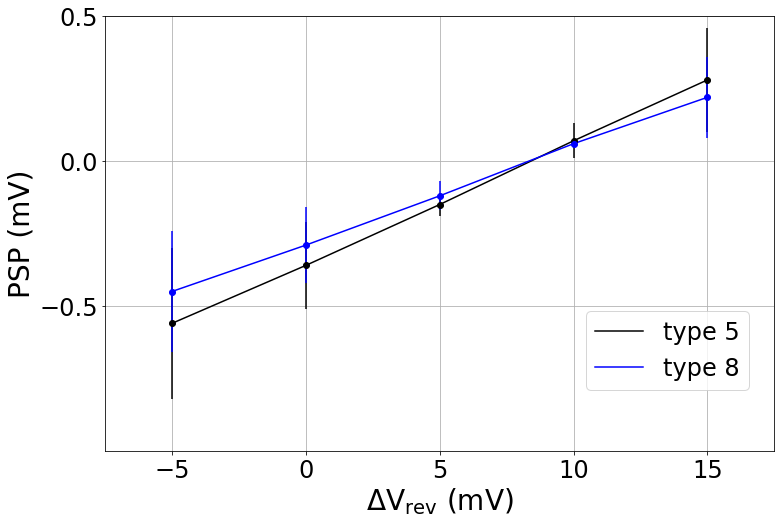

In [52]:
figSize = (12,8)
fig = plt.figure(figsize=figSize)  # Open a new figure

x= [-5, 0, 5, 10, 15]
y= [-0.56, -0.36, -0.15, 0.07, 0.28]
y_error = [0.26, 0.15, 0.04, 0.06, 0.18]

y2= [-0.45, -0.29, -0.12, 0.06, 0.22]
y2_error = [0.21, 0.13, 0.05, 0., 0.14]

# plt.scatter(x,y)
plt.plot(x,y,'k-', linewidth=1.5, label='type 5')
plt.errorbar(x, y, yerr = y_error,fmt='o',ecolor = 'black',color='black')

plt.plot(x,y2,'b-', linewidth=1.5, label='type 8')
plt.errorbar(x, y2, yerr = y2_error,fmt='o',ecolor = 'blue',color='blue')

# plt.plot([-5,0,5,10,15],[,2,3],'bo')
plt.legend(loc='upper right', fontsize=24, bbox_to_anchor=(0.98, 0.35))
# plt.title(r'$\Delta V_{rev} = 1$ mV (All GABA$_A$ synapse)', fontsize=18)
plt.xlim(-7.5,17.5)
plt.ylim(-1.0,0.5)
plt.xlabel(r'$\Delta$V$_{\rm rev}$ (mV)', fontsize=28)
plt.ylabel('PSP (mV)', fontsize=28)
plt.xticks([-5,0,5,10,15],fontsize=24);
plt.yticks([-0.5,0,0.5], fontsize=24); 
plt.grid(True)

plt.savefig('../info/IPSPmax_L5PC_type5and8_gabaaVrev.png', facecolor = 'white' , dpi=300)

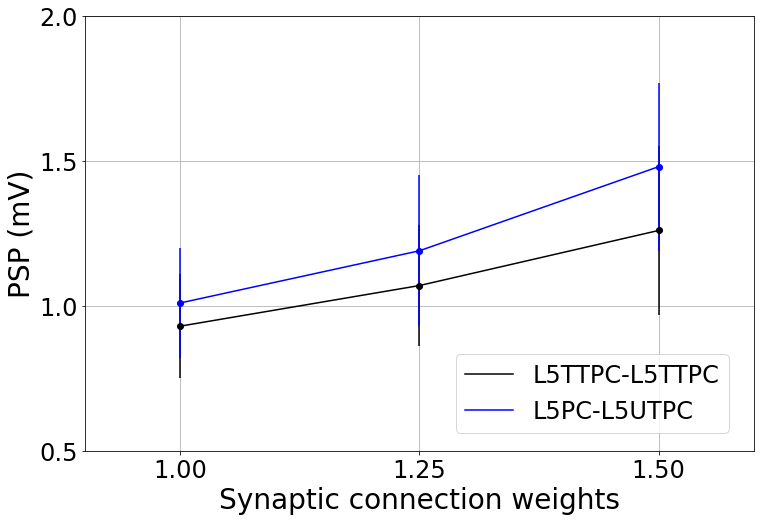

In [64]:
figSize = (12,8)
fig = plt.figure(figsize=figSize)  # Open a new figure

x= [1, 1.25, 1.5]
y= [0.93, 1.07, 1.26]
y_error = [0.18, 0.21, 0.29]

y2= [1.01, 1.19, 1.48]
y2_error = [0.19, 0.26, 0.29]

plt.plot(x,y,'k-', linewidth=1.5, label='L5TTPC-L5TTPC')
plt.errorbar(x, y, yerr = y_error,fmt='o',ecolor = 'black',color='black')

plt.plot(x,y2,'b-', linewidth=1.5, label='L5PC-L5UTPC')
plt.errorbar(x, y2, yerr = y2_error,fmt='o',ecolor = 'blue',color='blue')

plt.legend(loc='upper right', fontsize=24, bbox_to_anchor=(0.98, 0.25))
plt.xlim(0.9,1.6)
plt.ylim(0.5,2.0)
plt.xlabel(r'Synaptic connection weights', fontsize=28)
plt.ylabel('PSP (mV)', fontsize=28)
plt.xticks([1,1.25,1.5],fontsize=24);
plt.yticks([0.5, 1, 1.5, 2.], fontsize=24); 
plt.grid(True)

plt.savefig('../info/EPSPmax_L5PC_gsyn.png', facecolor = 'white' , dpi=300)